<a href="https://colab.research.google.com/github/sushmita-2002/Sentiment-Analysis-Model/blob/main/BERT_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the csv data to Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset sentiment analysis/Train_final.csv')
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label
0,en_0038023,product_en_0449126,reviewer_en_0834231,5,Very bright. Very good for my bathroom!,Bright!,other,Positive
1,en_0965034,product_en_0327562,reviewer_en_0811802,4,Great cushion. Little small pieces of nylon co...,Cushion,office_product,Positive
2,en_0508085,product_en_0672133,reviewer_en_0677525,2,The lights are great but the sea creatures los...,It’s just okay,home,Negative
3,en_0787691,product_en_0225769,reviewer_en_0483050,3,"If you're a big KA fan, I'm sure you'll love t...",It's ok,digital_ebook_purchase,Positive
4,en_0633243,product_en_0203059,reviewer_en_0767425,5,"Comfy, great quality",Love,home,Positive


In [ ]:
df.count()

review_id           200000
product_id          200000
reviewer_id         200000
stars               200000
review_body         200000
review_title        199967
product_category    200000
Sentiment Label     200000
dtype: int64

In [ ]:
df.duplicated().sum() ##counting the duplicate data

0

In [ ]:
# Shuffle the DataFrame randomly (to prevent inherent patterns or orders)
shuffled_train = df.sample(frac=1, random_state=42)

# Reset the index of the shuffled DataFrame (optional)
shuffled_train = shuffled_train.reset_index(drop=True)

In [ ]:
## Exploring the shuffled data
# Display the first few rows of the dataset
shuffled_train.head()

# Check the data types and missing values
shuffled_train.info()

# Summary statistics
shuffled_train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      199967 non-null  object
 6   product_category  200000 non-null  object
 7   Sentiment Label   200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


,stars
count,200000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
shuffled_train.dtypes

review_id           object
product_id          object
reviewer_id         object
stars                int64
review_body         object
review_title        object
product_category    object
Sentiment Label     object
dtype: object

In [ ]:
shuffled_train['stars'].value_counts()

stars
2    40000
5    40000
3    40000
4    40000
1    40000
Name: count, dtype: int64

BASIC EDA of training dataset

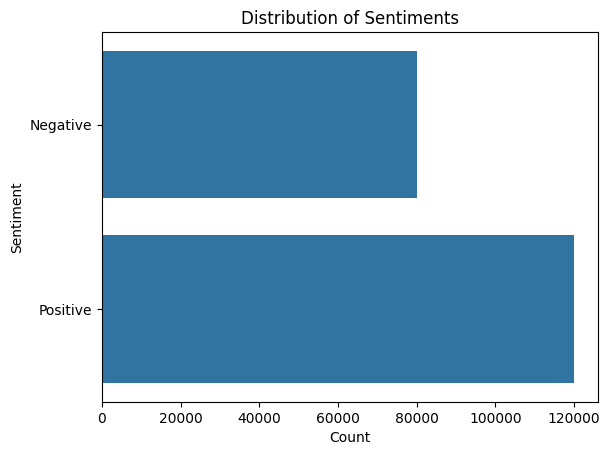

In [ ]:
##sentiment distribution
sns.countplot(y=shuffled_train['Sentiment Label'])
plt.title('Distribution of Sentiments')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.show()

Class Imbalance problem

In [ ]:
shuffled_train['Sentiment Label'].value_counts()

Sentiment Label
Positive    120000
Negative     80000
Name: count, dtype: int64

In [ ]:
shuffled_train.isnull().sum()

review_id            0
product_id           0
reviewer_id          0
stars                0
review_body          0
review_title        33
product_category     0
Sentiment Label      0
dtype: int64

In [ ]:
shuffled_train.columns


Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'product_category', 'Sentiment Label'],
      dtype='object')

<Axes: ylabel='count'>

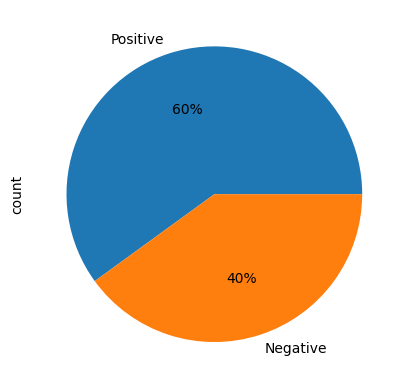

In [ ]:
shuffled_train['Sentiment Label'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

Counts and length

In [ ]:
## Character count
lenght = len(shuffled_train['review_body'][0])
print(f'Length of a sample review: {lenght}')

shuffled_train['Length'] = shuffled_train['review_body'].str.len()
shuffled_train.head(10)

Length of a sample review: 76


,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label,Length
0,en_0944516,product_en_0771017,reviewer_en_0516437,2,Tried to stand it on my ceramic counter - but ...,Doesn't hold,beauty,Negative,76
1,en_0365489,product_en_0303438,reviewer_en_0993746,5,Received my order quickly! Good deal on this o...,Good deal on this order,drugstore,Positive,115
2,en_0953574,product_en_0119948,reviewer_en_0766383,3,A little disappointing. Not very bright and th...,Not very bright.,home_improvement,Positive,58
3,en_0571603,product_en_0683693,reviewer_en_0074314,4,Good product and looks good on the wall.,Great space saver,office_product,Positive,40
4,en_0335241,product_en_0296351,reviewer_en_0740514,2,The chain within two weeks was worn off and ru...,Disatisfied With Product,pet_products,Negative,135
5,en_0227630,product_en_0381391,reviewer_en_0499451,1,"Never could get it to work. Not only that, it ...",Absolutely NOT,toy,Negative,89
6,en_0770135,product_en_0186651,reviewer_en_0560478,5,Fun tassels and great quality,Fun,home,Positive,29
7,en_0115228,product_en_0056478,reviewer_en_0785008,4,"Very lightweight, and shuts off instantly if i...",Efficient little heater,home,Positive,199
8,en_0522350,product_en_0953422,reviewer_en_0130883,4,Just what I needed. Expandable and fairly well...,Four Stars,electronics,Positive,69
9,en_0325410,product_en_0998839,reviewer_en_0300412,1,"One in three work at all, sadly it was the fir...",1 in 3 work - AVOID THIS!,industrial_supplies,Negative,290


<Axes: >

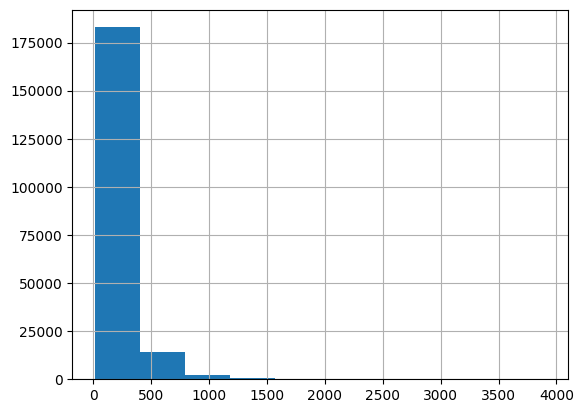

In [ ]:
shuffled_train['review_body'].str.len().hist() ## no. of character appearing

In [ ]:
## Word Count: Number of words in a review
word_count = shuffled_train['review_body'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 15


In [ ]:
def word_count(review_body):
    review_list = review_body.split()
    return len(review_list)
shuffled_train['Word_count'] = shuffled_train['review_body'].apply(word_count)
shuffled_train.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label,Length,Word_count
0,en_0944516,product_en_0771017,reviewer_en_0516437,2,Tried to stand it on my ceramic counter - but ...,Doesn't hold,beauty,Negative,76,15
1,en_0365489,product_en_0303438,reviewer_en_0993746,5,Received my order quickly! Good deal on this o...,Good deal on this order,drugstore,Positive,115,20
2,en_0953574,product_en_0119948,reviewer_en_0766383,3,A little disappointing. Not very bright and th...,Not very bright.,home_improvement,Positive,58,10
3,en_0571603,product_en_0683693,reviewer_en_0074314,4,Good product and looks good on the wall.,Great space saver,office_product,Positive,40,8
4,en_0335241,product_en_0296351,reviewer_en_0740514,2,The chain within two weeks was worn off and ru...,Disatisfied With Product,pet_products,Negative,135,26
5,en_0227630,product_en_0381391,reviewer_en_0499451,1,"Never could get it to work. Not only that, it ...",Absolutely NOT,toy,Negative,89,17
6,en_0770135,product_en_0186651,reviewer_en_0560478,5,Fun tassels and great quality,Fun,home,Positive,29,5
7,en_0115228,product_en_0056478,reviewer_en_0785008,4,"Very lightweight, and shuts off instantly if i...",Efficient little heater,home,Positive,199,35
8,en_0522350,product_en_0953422,reviewer_en_0130883,4,Just what I needed. Expandable and fairly well...,Four Stars,electronics,Positive,69,13
9,en_0325410,product_en_0998839,reviewer_en_0300412,1,"One in three work at all, sadly it was the fir...",1 in 3 work - AVOID THIS!,industrial_supplies,Negative,290,57


In [ ]:
## Mean word length: Average length of words

shuffled_train['mean_word_length'] = shuffled_train['review_body'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
shuffled_train.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label,Length,Word_count,mean_word_length
0,en_0944516,product_en_0771017,reviewer_en_0516437,2,Tried to stand it on my ceramic counter - but ...,Doesn't hold,beauty,Negative,76,15,4.133333
1,en_0365489,product_en_0303438,reviewer_en_0993746,5,Received my order quickly! Good deal on this o...,Good deal on this order,drugstore,Positive,115,20,4.800000
2,en_0953574,product_en_0119948,reviewer_en_0766383,3,A little disappointing. Not very bright and th...,Not very bright.,home_improvement,Positive,58,10,4.900000
3,en_0571603,product_en_0683693,reviewer_en_0074314,4,Good product and looks good on the wall.,Great space saver,office_product,Positive,40,8,4.125000
4,en_0335241,product_en_0296351,reviewer_en_0740514,2,The chain within two weeks was worn off and ru...,Disatisfied With Product,pet_products,Negative,135,26,4.230769
5,en_0227630,product_en_0381391,reviewer_en_0499451,1,"Never could get it to work. Not only that, it ...",Absolutely NOT,toy,Negative,89,17,4.294118
6,en_0770135,product_en_0186651,reviewer_en_0560478,5,Fun tassels and great quality,Fun,home,Positive,29,5,5.000000
7,en_0115228,product_en_0056478,reviewer_en_0785008,4,"Very lightweight, and shuts off instantly if i...",Efficient little heater,home,Positive,199,35,4.714286
8,en_0522350,product_en_0953422,reviewer_en_0130883,4,Just what I needed. Expandable and fairly well...,Four Stars,electronics,Positive,69,13,4.384615
9,en_0325410,product_en_0998839,reviewer_en_0300412,1,"One in three work at all, sadly it was the fir...",1 in 3 work - AVOID THIS!,industrial_supplies,Negative,290,57,4.105263


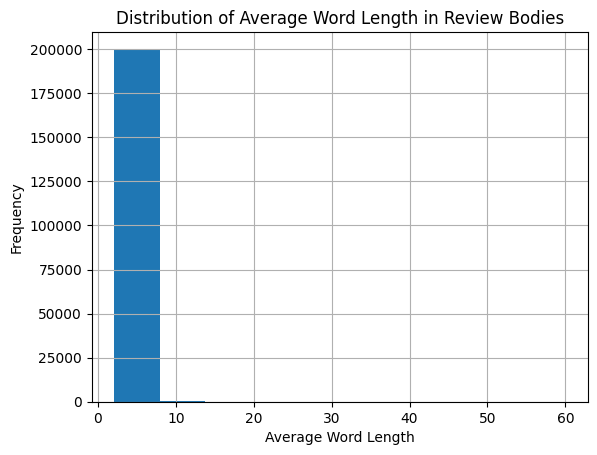

In [ ]:
## average word length graph
shuffled_train['review_body'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Length in Review Bodies')
plt.show()

In [ ]:
## Mean sentence length: Average length of the sentences in the review

import nltk
nltk.download('punkt') ##punkt is a package that inlcudes tokenizer & other tools
from nltk import tokenize

np.mean([len(sent) for sent in tokenize.sent_tokenize(shuffled_train['review_body'][0])]) #avg length of sentence

shuffled_train['mean_sent_length'] = shuffled_train['review_body'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
shuffled_train.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label,Length,Word_count,mean_word_length,mean_sent_length
0,en_0944516,product_en_0771017,reviewer_en_0516437,2,Tried to stand it on my ceramic counter - but ...,Doesn't hold,beauty,Negative,76,15,4.133333,76.0
1,en_0365489,product_en_0303438,reviewer_en_0993746,5,Received my order quickly! Good deal on this o...,Good deal on this order,drugstore,Positive,115,20,4.800000,28.0
2,en_0953574,product_en_0119948,reviewer_en_0766383,3,A little disappointing. Not very bright and th...,Not very bright.,home_improvement,Positive,58,10,4.900000,28.5
3,en_0571603,product_en_0683693,reviewer_en_0074314,4,Good product and looks good on the wall.,Great space saver,office_product,Positive,40,8,4.125000,40.0
4,en_0335241,product_en_0296351,reviewer_en_0740514,2,The chain within two weeks was worn off and ru...,Disatisfied With Product,pet_products,Negative,135,26,4.230769,67.0
5,en_0227630,product_en_0381391,reviewer_en_0499451,1,"Never could get it to work. Not only that, it ...",Absolutely NOT,toy,Negative,89,17,4.294118,29.0
6,en_0770135,product_en_0186651,reviewer_en_0560478,5,Fun tassels and great quality,Fun,home,Positive,29,5,5.000000,29.0
7,en_0115228,product_en_0056478,reviewer_en_0785008,4,"Very lightweight, and shuts off instantly if i...",Efficient little heater,home,Positive,199,35,4.714286,99.0
8,en_0522350,product_en_0953422,reviewer_en_0130883,4,Just what I needed. Expandable and fairly well...,Four Stars,electronics,Positive,69,13,4.384615,34.0
9,en_0325410,product_en_0998839,reviewer_en_0300412,1,"One in three work at all, sadly it was the fir...",1 in 3 work - AVOID THIS!,industrial_supplies,Negative,290,57,4.105263,96.0


In [ ]:
def visualize(col, shuffled_train):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(y=shuffled_train[col], hue=shuffled_train['stars'])
    plt.xlabel('Count', labelpad=12.5)
    plt.ylabel(col)

    plt.subplot(1, 2, 2)
    for star_rating in shuffled_train['stars'].unique():
        sns.kdeplot(shuffled_train[shuffled_train['stars'] == star_rating][col], label=f'Stars {star_rating}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
## to get the corpus containing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<BarContainer object of 10 artists>

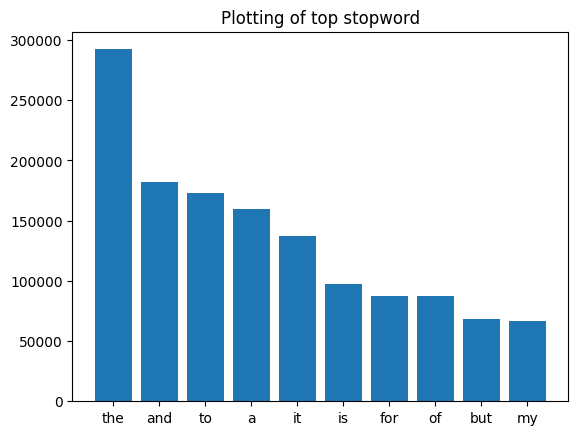

In [ ]:
## creating corpus
corpus=[]
review_word = shuffled_train['review_body'].str.split()
review_word=review_word.values.tolist()
corpus=[word for i in review_word for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.title('Plotting of top stopword')
plt.bar(x,y)

<Axes: >

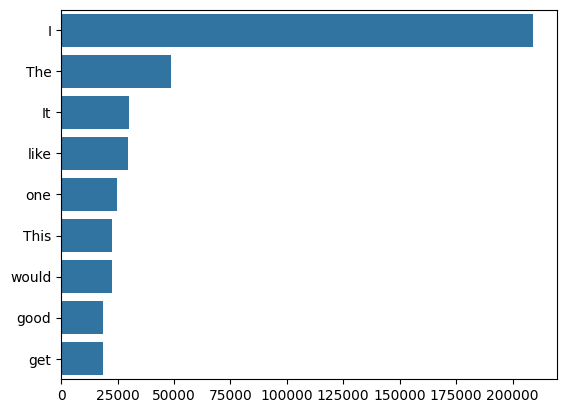

In [ ]:
## exploring frequency of words other than stopword
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

PREPROCESSING

In [ ]:
import nltk
nltk.download('stopwords')
import string
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-zA-Z0-9]', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('\+', '', text)  # Remove plus symbols
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\s+', ' ', text).strip()  # Remove extra whitespace
    text = ' '.join([word for word in text.split(' ') if word not in stopword])  # Remove stopwords
    text = ' '.join([stemmer.stem(word) for word in text.split(' ')])  # Stem words
    return text

# Apply the cleaning function to the "review_body" column in the df DataFrame
df["cleaned_review_body"] = df["review_body"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label,cleaned_review_body
0,en_0038023,product_en_0449126,reviewer_en_0834231,5,Very bright. Very good for my bathroom!,Bright!,other,Positive,bright good bathroom
1,en_0965034,product_en_0327562,reviewer_en_0811802,4,Great cushion. Little small pieces of nylon co...,Cushion,office_product,Positive,great cushion littl small piec nylon come insi...
2,en_0508085,product_en_0672133,reviewer_en_0677525,2,The lights are great but the sea creatures los...,It’s just okay,home,Negative,light great sea creatur lose clariti ceil end ...
3,en_0787691,product_en_0225769,reviewer_en_0483050,3,"If you're a big KA fan, I'm sure you'll love t...",It's ok,digital_ebook_purchase,Positive,big ka fan sure love find time start read ka r...
4,en_0633243,product_en_0203059,reviewer_en_0767425,5,"Comfy, great quality",Love,home,Positive,comfi great qualiti
5,en_0523320,product_en_0672474,reviewer_en_0554983,2,I selected this because I wanted to use it in ...,Not always glycerine-based!,grocery,Negative,select want use carbon water home glycerin bas...
6,en_0755543,product_en_0078093,reviewer_en_0874731,1,I don't think this stuff is the original/actua...,Scared not original product. Broke out like cr...,beauty,Negative,think stuff origin actual product weird white ...
7,en_0565744,product_en_0952099,reviewer_en_0341434,5,So beautiful. It's going to wonder full our 2 ...,Stunning,kitchen,Positive,beauti go wonder full 2 tier wed cake
8,en_0696360,product_en_0886169,reviewer_en_0024036,4,Super easy swap with a 12 year old helper. Sol...,Fit,home_improvement,Positive,super easi swap 12 year old helper solv bang b...
9,en_0079497,product_en_0175755,reviewer_en_0063424,2,I only got 8 sets! I was supposed to receive 1...,didn't get correct quantity.,pet_products,Negative,got 8 set suppos receiv 10 set 4 pad


In [ ]:
!pip install wordcloud

visualizing preprocessed review

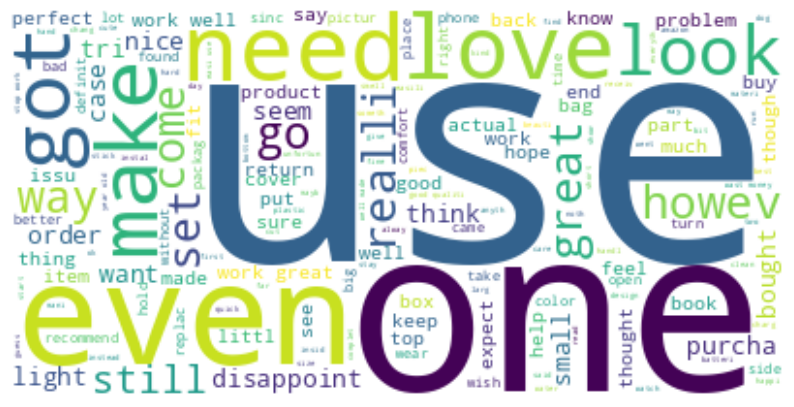

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Concatenating all the text from the 'Review' column into a single string
text = " ".join(review for review in df['cleaned_review_body'])

# Defining a set of stopwords
stopwords = set(STOPWORDS)

# Creating a WordCloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Setting up the figure size
plt.figure(figsize=(10, 10))

# Displaying the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment Label' to get encoded labels
df['Encoded_Label'] = label_encoder.fit_transform(df['Sentiment Label'])

# Print the mapping of original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original labels to encoded values:")
print(label_mapping)

# Display the updated DataFrame with the 'Encoded Label' column
print("Updated DataFrame:")
df.head()

Mapping of original labels to encoded values:
{'Negative': 0, 'Positive': 1}
Updated DataFrame:


,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label,cleaned_review_body,Encoded_Label
0,en_0038023,product_en_0449126,reviewer_en_0834231,5,Very bright. Very good for my bathroom!,Bright!,other,Positive,bright good bathroom,1
1,en_0965034,product_en_0327562,reviewer_en_0811802,4,Great cushion. Little small pieces of nylon co...,Cushion,office_product,Positive,great cushion littl small piec nylon come insi...,1
2,en_0508085,product_en_0672133,reviewer_en_0677525,2,The lights are great but the sea creatures los...,It’s just okay,home,Negative,light great sea creatur lose clariti ceil end ...,0
3,en_0787691,product_en_0225769,reviewer_en_0483050,3,"If you're a big KA fan, I'm sure you'll love t...",It's ok,digital_ebook_purchase,Positive,big ka fan sure love find time start read ka r...,1
4,en_0633243,product_en_0203059,reviewer_en_0767425,5,"Comfy, great quality",Love,home,Positive,comfi great qualiti,1


VECTORIZATION FOR CONVERSION OF TEXT TO NUMERICAL FEATURES

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Apply TF-IDF vectorization to the 'cleaned_review_body' column
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_review_body'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

'''
# Concatenate the TF-IDF features with the original DataFrame
df = pd.concat([df, tfidf_df], axis=1)
'''

'\n# Concatenate the TF-IDF features with the original DataFrame\ndf = pd.concat([df, tfidf_df], axis=1)\n'

In [ ]:
tfidf_df.head()

,10,100,12,15,20,2nd,30,50,abl,absolut,...,write,written,wrong,xl,year,yellow,yes,yet,zero,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.149808,0.0,0.0,0.0,0.113269,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Find the top TF-IDF terms for the sixth review
top_tfidf_terms = tfidf_df.iloc[5].sort_values(ascending=False).head(10)
print(df['cleaned_review_body'][5])
print(top_tfidf_terms)

select want use carbon water home glycerin base version sunflow oil base version sunflow version mix well water leav oil slick top oil would product imag show glycerin receiv sunflow oil
oil        0.639039
version    0.499845
base       0.300241
water      0.256374
imag       0.179330
mix        0.166163
home       0.148208
leav       0.141943
show       0.136344
top        0.123685
Name: 5, dtype: float64


In [ ]:
# Find the terms with the highest average TF-IDF scores
average_tfidf = tfidf_df.mean()
top_avg_tfidf_terms = average_tfidf.sort_values(ascending=False).head(10)
print(top_avg_tfidf_terms)

work       0.034364
use        0.029553
great      0.028209
like       0.027595
good       0.026712
product    0.024643
one        0.023928
love       0.022565
look       0.020570
would      0.019053
dtype: float64


FEATURE ENGINEERING

In [ ]:
# Features (TF-IDF)
X = tfidf_features

# Target (Encoded Sentiment Label)
y = df['Encoded_Label']

DATASET TRAIN TEST SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

BERT IMPLEMENTATION

In [ ]:
!pip install transformers

In [ ]:
#IMPORT NEESSARY LIBRARIES
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

 BERT requires even more attention when it comes to this representation.

Here are the requirements:

Add special tokens to separate sentences and do classification
Pass sequences of constant length (introduce padding)
Create array of 0s (pad token) and 1s (real token) called attention mask
BERT offers a few model architectures and I will be using one of them combined with manual preprocessing. I am using the cased version which considers GREAT and great to be to different entities and BAD might be given more focus than bad.

The tokenizer will break the sentence into words and give numerical values to each word.

In [ ]:
# Set the model name
MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


BERT works with fixed-length sequences. We’ll use a simple strategy to choose the max length. Let’s store the token length of each review.



In [ ]:
# Store length of each review
token_lens = []

# Iterate through the content slide
for txt in df.review_body:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 0, 'Token count')

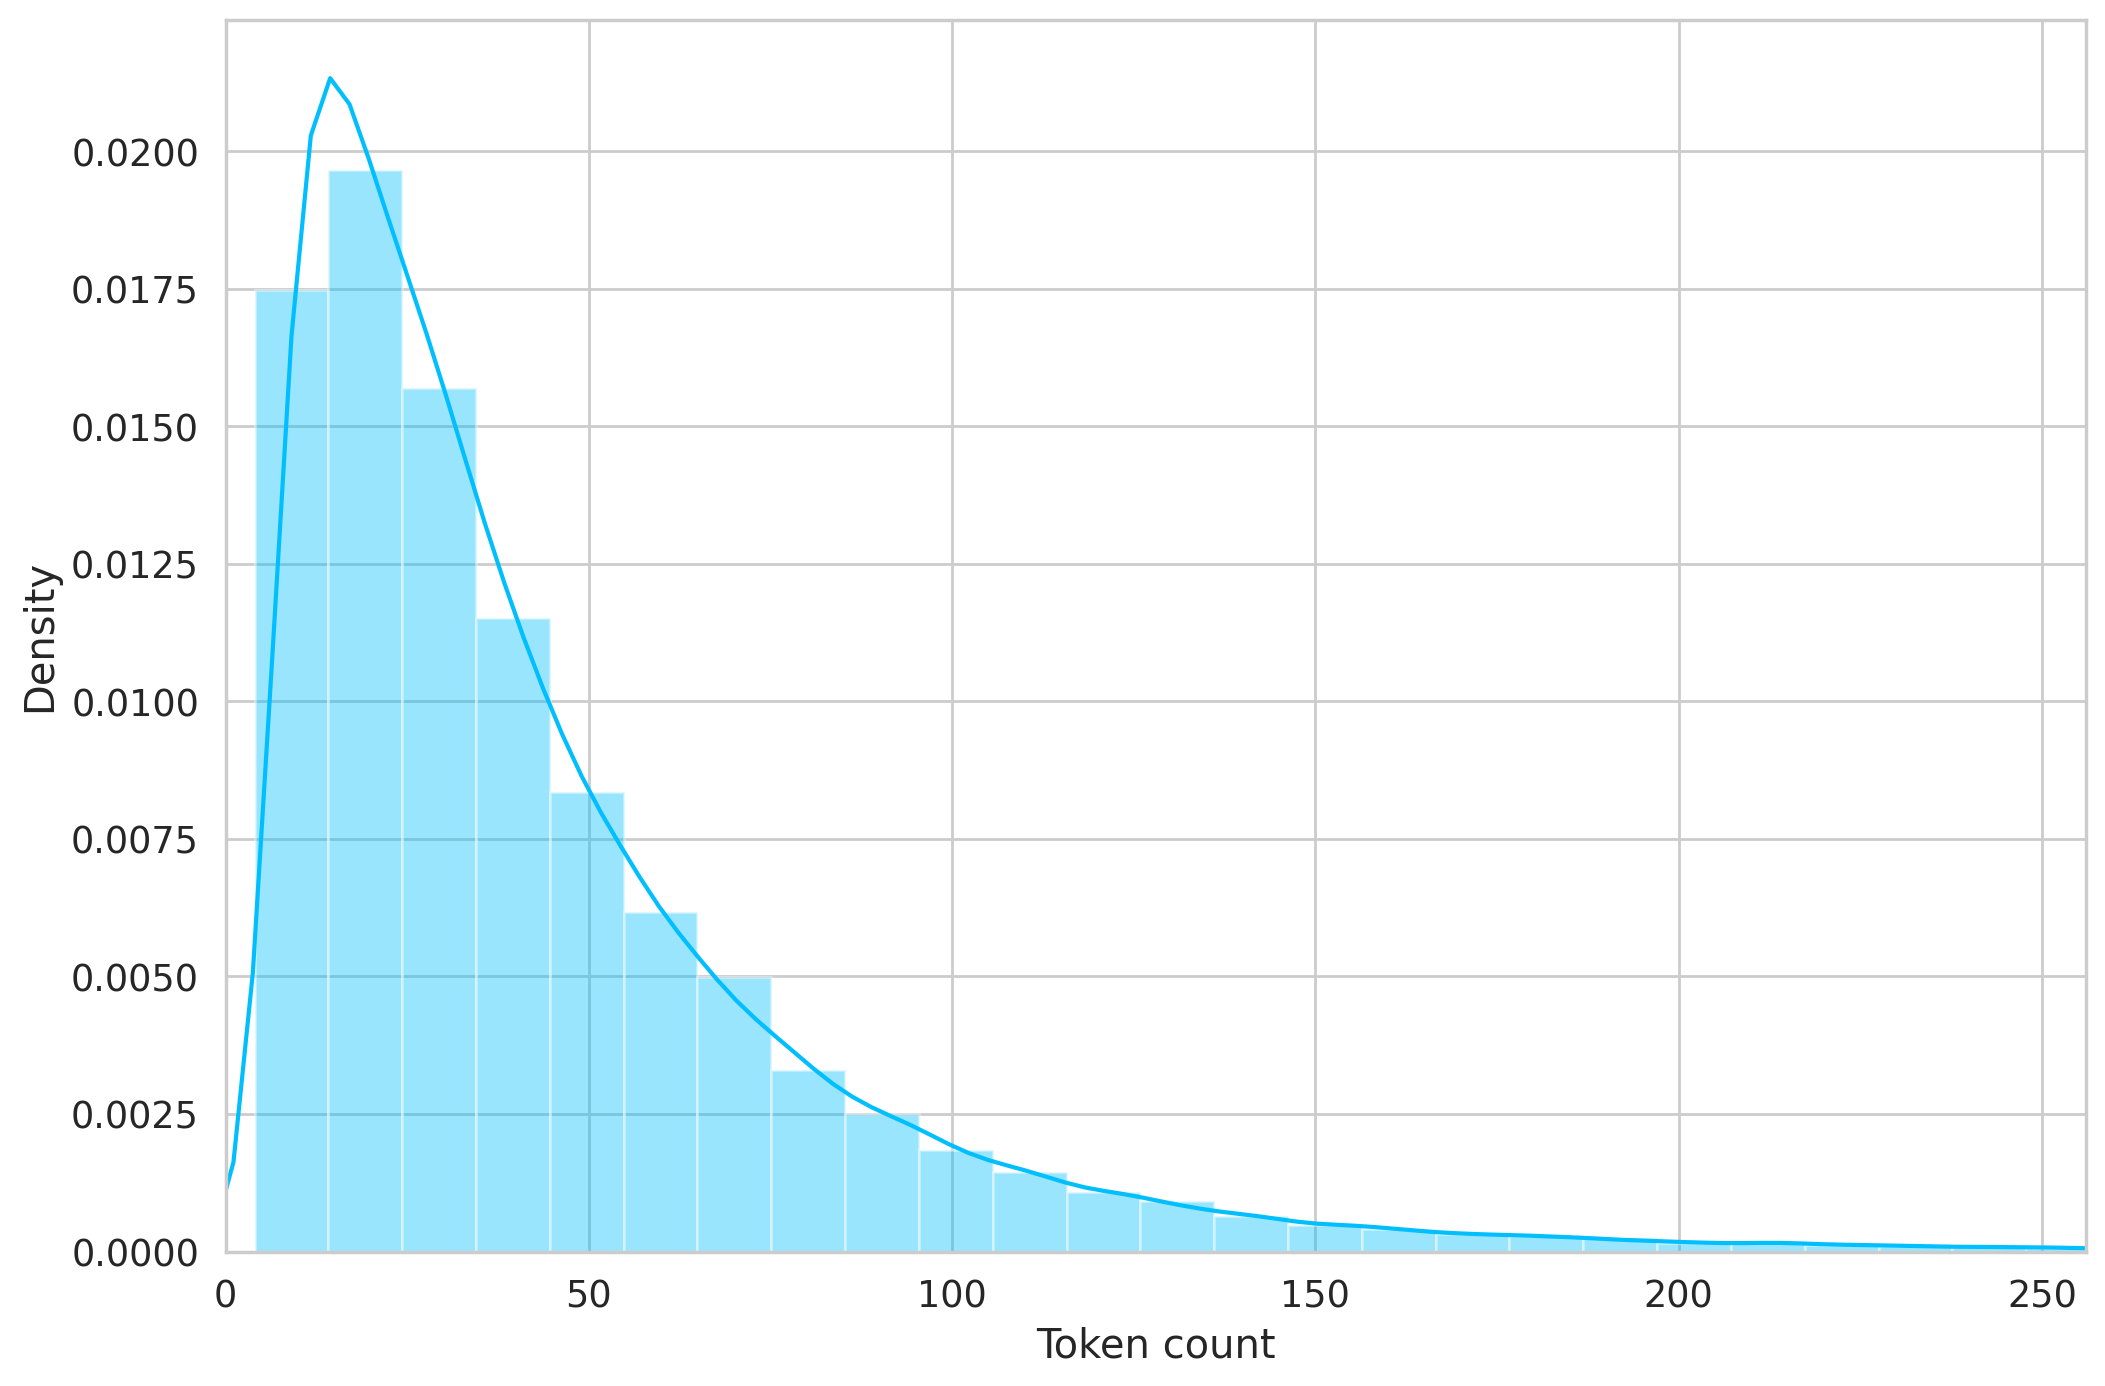

In [ ]:
# plot the distribution of review lengths
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [ ]:
MAX_LEN = 160

Preparing Torch Dataset
To enter data into a PyTorch, we need a more robust data generator class. We will return the review text as well to validate our predictions easily.

In [ ]:
class GPReviewDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.reviews)

    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

    # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

Create a 80% train data and 10% test and 10% validation data

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(160000, 10) (20000, 10) (20000, 10)


Create a dataloader to release data in batches.

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        reviews=df.review_body.to_numpy(),
        targets=df['Encoded_Label'].to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [ ]:
# Create train, test and val data loaders
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
# Examples
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


Sentiment Classification with BERT and Hugging Face
We will use the basic BertModel and build our sentiment classifier on top of it. Let us load the model

In [ ]:
# Load the basic BERT model
bert_model = BertModel.from_pretrained(MODEL_NAME)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
# Build the Sentiment Classifier class
class SentimentClassifier(nn.Module):

    # Constructor class
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        pooled_output = bert_output.pooler_output # Accessing the pooled output
        #  Add a dropout layer
        output = self.drop(pooled_output)
        return self.out(output)

We use a dropout layer for some regularization and a fully-connected layer for our output. We are returning the raw output of the last layer since that is required for the cross-entropy loss function in PyTorch to work. Create an instance and move it to the GPU

In [ ]:
# Instantiate the model and move to classifier
model = SentimentClassifier(len('Sentiment Label'))
model = model.to(device)

MODEL CHARACTERISTICS

In [ ]:
# Number of hidden units
print(bert_model.config.hidden_size)

768


Training Phase
we’ll use the AdamW optimizer provided by Hugging Face. It corrects weight decay. We’ll also use a linear scheduler with no warmup

In [ ]:
# Number of iterations
EPOCHS = 1

# Optimizer Adam
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        # Backward prop
        loss.backward()

        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

Write a function to evaluate model performance

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

Write the training Loop and store the best training state.

In [ ]:
%%time
from tqdm import tqdm

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

    # Show details
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    # Create a progress bar
    with tqdm(total=len(train_data_loader), unit='batch') as pbar:
        for i, d in enumerate(train_data_loader):
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            # Backward prop
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

            # Update the progress bar
            pbar.update(1)
            pbar.set_description(f"Loss: {loss.item():.4f}")

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f"Train loss {train_loss} accuracy {train_acc}")

    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

     # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc


Epoch 1/1
----------


Loss: 0.4334: 100%|██████████| 10000/10000 [1:10:41<00:00,  2.36batch/s]


In [ ]:
# Plot training and validation accuracy
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

NameError: name 'plt' is not defined

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()